In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 

In [4]:
import pathlib 
dataset_Path = "/Users/Hakkar/Desktop/MultiModal2/Data/Brain"
data_dir = pathlib.Path(dataset_Path)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2501


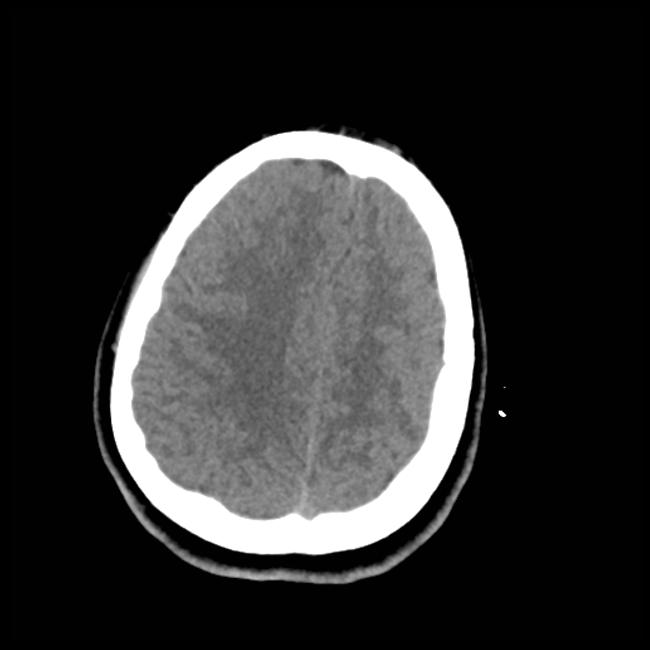

In [8]:
positiv = list(data_dir.glob('Positiv/*'))
PIL.Image.open(str(positiv[0]))

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split = 0.2,
subset = "training",
seed = 123,
image_size = (img_height, img_width),
batch_size = batch_size)

Found 2501 files belonging to 2 classes.
Using 2001 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split = 0.2,
subset = "validation",
seed = 123,
image_size = (img_height, img_width),
batch_size = batch_size)

Found 2501 files belonging to 2 classes.
Using 500 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Negativ', 'Positiv']


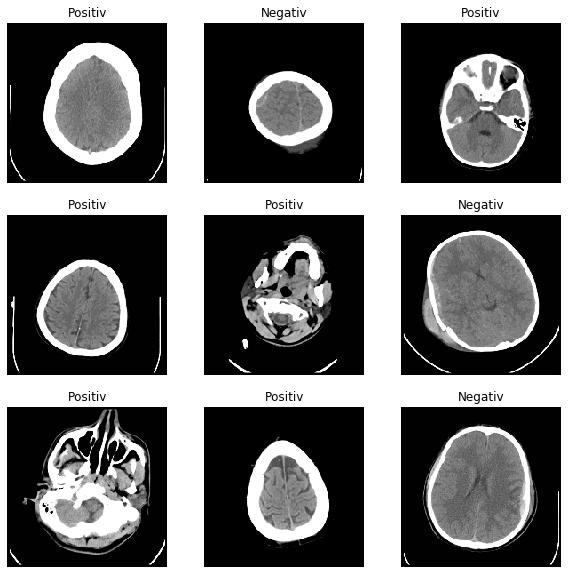

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [23]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [26]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
63/63 [==============================] - 46s 735ms/step - loss: 0.5247 - accuracy: 0.8240 - val_loss: 0.2731 - val_accuracy: 0.8720
Epoch 2/10
63/63 [==============================] - 38s 601ms/step - loss: 0.2664 - accuracy: 0.8890 - val_loss: 0.2180 - val_accuracy: 0.8900
Epoch 3/10
63/63 [==============================] - 39s 611ms/step - loss: 0.1876 - accuracy: 0.9215 - val_loss: 0.1788 - val_accuracy: 0.9300
Epoch 4/10
63/63 [==============================] - 39s 611ms/step - loss: 0.1045 - accuracy: 0.9564 - val_loss: 0.1452 - val_accuracy: 0.9440
Epoch 5/10
63/63 [==============================] - 38s 596ms/step - loss: 0.0854 - accuracy: 0.9643 - val_loss: 0.1435 - val_accuracy: 0.9540
Epoch 6/10
63/63 [==============================] - 37s 591ms/step - loss: 0.0770 - accuracy: 0.9770 - val_loss: 0.1473 - val_accuracy: 0.9520
Epoch 7/10
63/63 [==============================] - 38s 596ms/step - loss: 0.0350 - accuracy: 0.9848 - val_loss: 0.1617 - val_accuracy: 0.9500

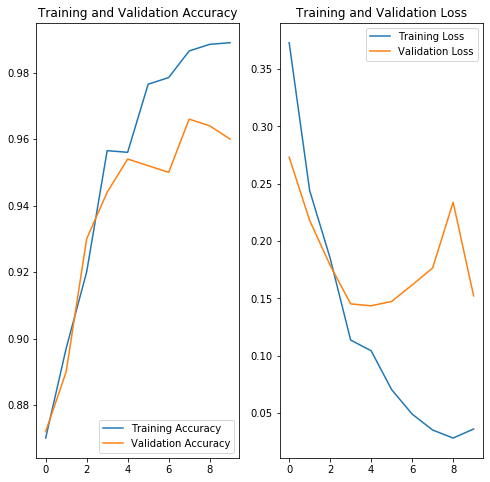

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()